# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
import pandas as pd
# Show floats with 2 decimals
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

Fun fact:

The code provided above

student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]}) 

doesn`t result in creating a dataframe.
After consulting ChatGPT I removed the [] from the code. 

In [10]:
# Your code here.
x_values = [17,51,27,21,36,48,19,26,54,30]
y_values= [10,1,5,9,4,2,9,6,0,3]
student_data = pd.DataFrame({'X': x_values, 'Y': y_values})
student_data.head()

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4


In [15]:
#student_data['Student ID'] = np.arange(1, len(student_data) + 1, 1, dtype=int)
#student_data

,X,Y,Student ID
0,17,10,1
1,51,1,2
2,27,5,3
3,21,9,4
4,36,4,5
5,48,2,6
6,19,9,7
7,26,6,8
8,54,0,9
9,30,3,10


Draw a dispersion diagram (scatter plot) for the data.

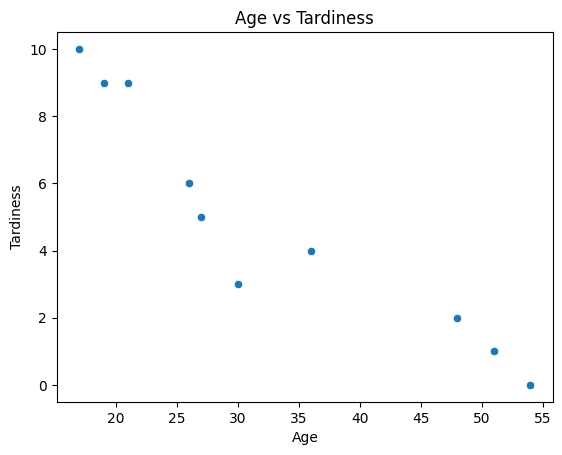

In [16]:
# Your code here.

sns.scatterplot(x='X', y='Y', data=student_data)
plt.xlabel('Age')
plt.ylabel('Tardiness')
plt.title('Age vs Tardiness')
plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 
'''
We can clearly see a negative trend, the older the student, the less tardies

Hypothesis: There is a negative linear correlation between age and tardiness

'''


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [17]:
# Your response here.
#correlation:

student_data.corr()


#covariance:


,X,Y,Student ID
X,1.00,-0.94,0.19
Y,-0.94,1.00,-0.35
Student ID,0.19,-0.35,1.00


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [23]:
# Your response here.
# independent variable -> Student Age ['X']
# target variable -> Tardiness number of tardies ['Y']

model = linear_model.LinearRegression()
X = student_data.drop(['Y', 'Student ID'], axis=1) 
y = student_data['Y']


In [24]:
# Fit model
result = model.fit(X, y)

print("Intercept:", result.intercept_)
print("Coefficient:", result.coef_)

Intercept: 12.888803363135771
Coefficient: [-0.24282077]


Plot your regression model on your scatter plot.

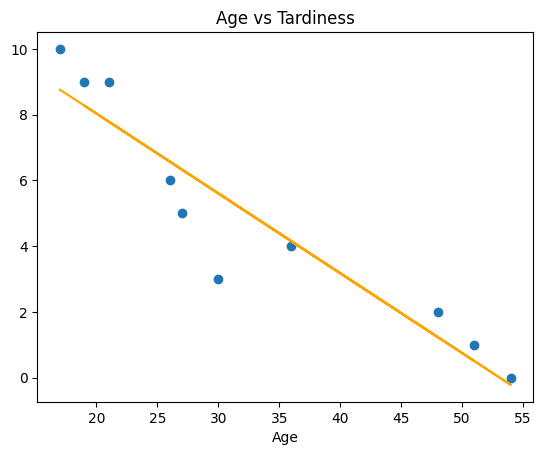

In [28]:
# Your code here.

# Create regression line equation
regression_line = result.intercept_ + student_data.X * result.coef_
plt.plot(student_data.X, regression_line, c='orange')

# Add line plot and scatter plot
plt.scatter(student_data.X, student_data.Y)
plt.xlabel('Age')
plt.title('Age vs Tardiness')
plt.show()


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [27]:
# Your response here. 
'''
Age is a good prediction of tardiness especially for age > 35
We can see that in this particular case the actual data points are extremely close to the regression line (is this the right word)
For age < 35 the residual (distance between actual data point and prediciton) is way higher. This means that in this case we can 
still predict tardiness on the basis of age, but our prediction is worse than for age > 35.
We can observe the highest residual for age 30, which means that are probably other reasons (like life for example :)
'''



SyntaxError: incomplete input (3787503786.py, line 2)

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [58]:
# Import any libraries you may need & the data

vehicles_data = pd.read_csv('vehicles.csv')
vehicles_data.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.50,4.00,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.39,18,17,17,522.76,1950
1,AM General,FJ8c Post Office,1984,4.20,6.00,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.35,13,13,13,683.62,2550
2,AM General,Post Office DJ5 2WD,1985,2.50,4.00,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.60,16,17,16,555.44,2100
3,AM General,Post Office DJ8 2WD,1985,4.20,6.00,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.35,13,13,13,683.62,2550
4,ASC Incorporated,GNX,1987,3.80,6.00,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.60,14,21,16,555.44,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [59]:
# Your response here. 

vehicles_data.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

In [60]:
vehicles = vehicles_data[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
vehicles.head(3)

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.00,19.39,17,1950,522.76
1,1984,6.00,25.35,13,2550,683.62
2,1985,4.00,20.60,16,2100,555.44


In [61]:
vehicles.isna().sum()

Year                       0
Cylinders                  0
Fuel Barrels/Year          0
Combined MPG               0
Fuel Cost/Year             0
CO2 Emission Grams/Mile    0
dtype: int64

In [62]:
vehicles_corr = vehicles.corr()
vehicles_corr

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.00,0.08,-0.22,0.20,-0.09,-0.22
Cylinders,0.08,1.00,0.74,-0.70,0.78,0.75
Fuel Barrels/Year,-0.22,0.74,1.00,-0.91,0.92,0.99
Combined MPG,0.20,-0.70,-0.91,1.00,-0.88,-0.93
Fuel Cost/Year,-0.09,0.78,0.92,-0.88,1.00,0.93
CO2 Emission Grams/Mile,-0.22,0.75,0.99,-0.93,0.93,1.00


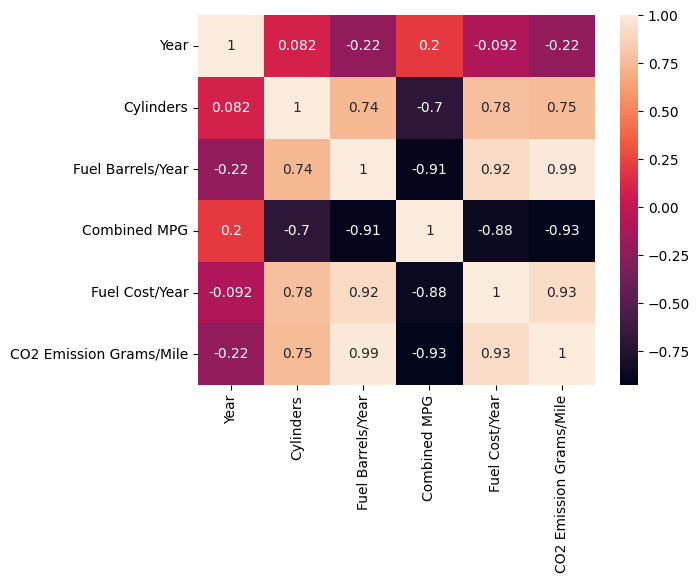

In [63]:
sns.heatmap(vehicles_corr, annot=True)
plt.show()

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

'Year' shows a high correlation to all the values except to target variable 'CO2 Emission Grams/Mile'. 
This means it could/probably would lead to multicollinearity issues. 


So later we`ll exclude 'Year'

In [69]:
from sklearn.preprocessing import StandardScaler
vehicles_scaled = pd.DataFrame(StandardScaler().fit_transform(vehicles), columns=vehicles.columns)
vehicles_scaled.describe().style.format('{:.2f}')

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
count,35952.00,35952.00,35952.00,35952.00,35952.00,35952.00
mean,0.00,0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.66,-2.15,-3.93,-2.53,-2.55,-3.68
25%,-0.96,-1.01,-0.65,-0.77,-0.77,-0.67
50%,0.03,0.13,-0.06,-0.18,-0.08,-0.06
75%,0.92,0.13,0.67,0.60,0.61,0.67
max,1.61,5.83,6.60,7.06,7.71,6.67


In [70]:
# Your response here. 
model = linear_model.LinearRegression()

# X-y split
X = vehicles_scaled.drop(['CO2 Emission Grams/Mile', 'Year'], axis=1)
y = vehicles_scaled['CO2 Emission Grams/Mile']

In [71]:
result = model.fit(X, y)
result.score(X, y)

print("Intercept:", result.intercept_)
print("Coefficient:", result.coef_)
print("R2 score:", result.score(X, y))

Intercept: -3.2068119095153477e-16
Coefficient: [ 0.01540363  0.73643022 -0.1359717   0.12515485]
R2 score: 0.9802919387898396


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
'''
The higher the coefficient the stronger the influence of the feature on the target variable
In our case 'Cylinders' has a coefficient of 0.736
An R2 score of 0.98 is very (suspiciuosly) high, it could though indicate 

In [51]:
# Your response here. 
# Is this the summary meant in the question? Got it from ChatGPT
import statsmodels.api as sm

model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                                   OLS Regression Results                                   
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          6.604e+06
Date:                     Thu, 21 Dec 2023   Prob (F-statistic):                        0.00
Time:                             17:48:57   Log-Likelihood:                     -1.5506e+05
No. Observations:                    35952   AIC:                                  3.101e+05
Df Residuals:                        35948   BIC:                                  3.102e+05
Df Model:                                4                                                  
Covariance Type:                 nonrobust                                                  
                        coef    std err          t      P>|t|      [0.

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [84]:
# Your code here.

x_data = [1,3,4,6,8,9,11,14]
y_data = [1,2,4,4,5,7,8,13]

party_data = pd.DataFrame({'X': x_data, 'Y': y_data})
party_data.head()


,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [85]:
model = linear_model.LinearRegression()
X = party_data.drop('Y', axis=1) 
y = party_data['Y']

result = model.fit(X, y)

print("Intercept:", result.intercept_)
print("Coefficient:", result.coef_)
print("R2 score:", result.score(X, y))

Intercept: -0.43939393939393945
Coefficient: [0.84848485]
R2 score: 0.9316696375519905


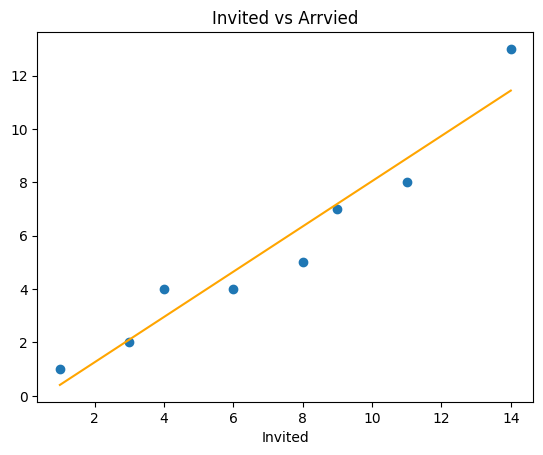

In [86]:
# Your code here.

regression_line = result.intercept_ + party_data.X * result.coef_
plt.plot(party_data.X, regression_line, c='orange')

# Add line plot and scatter plot
plt.scatter(party_data.X, party_data.Y)
plt.xlabel('Invited')
plt.title('Invited vs Arrvied')
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 
# What exactly are the results? 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

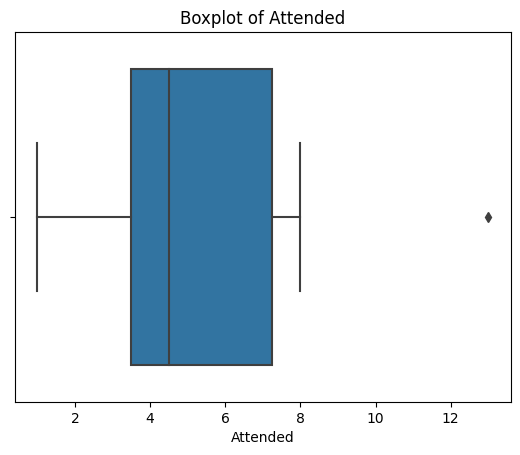

In [87]:
# Your response here. 

sns.boxplot(x='Y', data=party_data)
plt.xlabel('Attended')
plt.title('Boxplot of Attended')
plt.show()

In [ ]:
'''We can see from both graphs that 13 Attendees is an outlier.
'''

In [88]:
party_data.drop(party_data.index[-1], inplace=True)
result = model.fit(X, y)
print("Intercept:", result.intercept_)
print("Coefficient:", result.coef_)
print("R2 score:", result.score(X, y))

Intercept: -0.43939393939393945
Coefficient: [0.84848485]
R2 score: 0.9316696375519905


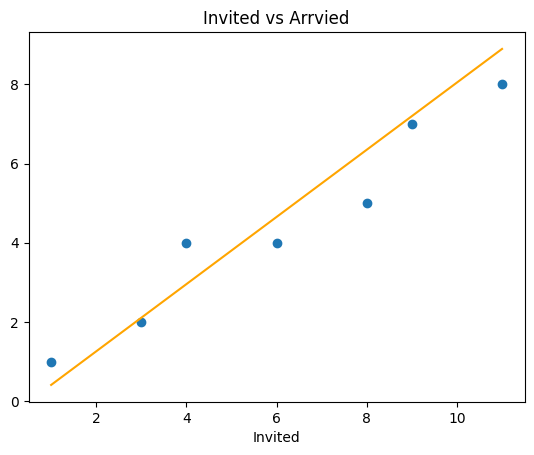

In [89]:
regression_line = result.intercept_ + party_data.X * result.coef_
plt.plot(party_data.X, regression_line, c='orange')

# Add line plot and scatter plot
plt.scatter(party_data.X, party_data.Y)
plt.xlabel('Invited')
plt.title('Invited vs Arrvied')
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
